# Mount Google Drive <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSUX6O-4BsthBE_xhtLuEN0CNFxzn8RY8DOJvuE-0SzEBcxCNAo7V51BuUDrUGISmMgVWs&usqp=CAU" height="20" width="22" /> to Colab

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Mount OneDrive <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/Microsoft_Office_OneDrive_%282019%E2%80%93present%29.svg/2560px-Microsoft_Office_OneDrive_%282019%E2%80%93present%29.svg.png" height="17" width="22" /> to Colab



## Install RCLONE <img src="https://biplobsd.github.io/RLabClone/img/title_rclonelab.svg" height="27" width="105" />
https://rclone.org/downloads/

https://github.com/rclone/rclone/releases/tag/v1.60.1

In [3]:
!python -m pip install --upgrade pip setuptools wheel
# https://colab.research.google.com/github/jakiya99/Torrent-to-Onedrive/blob/main/new_torrents_download_to_onedrive.ipynb#scrollTo=Fil_bHuAD8S3
# https://github.com/jakiyaa/Torrent-to-Onedrive/blob/main/full%20tutorial.md
# https://github.com/jakiyaa/rclone-authenticate

!wget https://downloads.rclone.org/v1.60.1/rclone-v1.60.1-linux-amd64.deb
!apt install ./rclone-v1.60.1-linux-amd64.deb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 5.3 MB/s 
     |████████████████████████████████| 1.2 MB 52.1 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
--2022-12-19 17:41:55--  https://downloads.rclone.org/v1.60.1/rclone-v1.60.1-linux-amd64.deb
Resolving downloads.rclone.org (downloads.rclone.org)... 95.217.6.16, 2a01:4f9:c012:7154::1
Connecting to downloads.rclone.org (downloads.rclone.

## config OneDrive

In [4]:
!rclone config

2022/12/19 17:42:11 NOTICE: Config file "/root/.config/rclone/rclone.conf" not found - using defaults
No remotes found, make a new one?
n) New remote
s) Set configuration password
q) Quit config
n/s/q> n

Enter name for new remote.
name> onedrive]=
Can't use "onedrive]=" as config name contains invalid characters - may only contain `0-9`, `A-Z`, `a-z`, `_`, `-`, `.` and space.
Enter name for new remote.
name> onedrive

Option Storage.
Type of storage to configure.
Choose a number from below, or type in your own value.
 1 / 1Fichier
   \ (fichier)
 2 / Akamai NetStorage
   \ (netstorage)
 3 / Alias for an existing remote
   \ (alias)
 4 / Amazon Drive
   \ (amazon cloud drive)
 5 / Amazon S3 Compliant Storage Providers including AWS, Alibaba, Ceph, China Mobile, Cloudflare, ArvanCloud, Digital Ocean, Dreamhost, Huawei OBS, IBM COS, IDrive e2, IONOS Cloud, Lyve Cloud, Minio, Netease, RackCorp, Scaleway, SeaweedFS, StackPath, Storj, Tencent COS, Qiniu and Wasabi
   \ (s3)
 6 / Backblaze B

## RCLONE mount OneDrive

In [5]:
!mkdir onedrive
# 사용자 shell이 종료되어도 작동되기 위해 nohup(no hang up), & 사용
!nohup rclone --vfs-cache-mode writes mount onedrive: ./onedrive &

nohup: appending output to 'nohup.out'


## Check OneDrvie file

In [6]:
!ls ./onedrive

 check.py		  OfficeMobile	     '한국어 방언 발화(경상도).zip'
 mimic-recording-studio   ttsdatasetcreator


# Data Processing

## Download Data
<img src="https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png?20140912155123" height="30" width="120" />

[**Jejueo Single Speaker Speech Dataset**](https://www.kaggle.com/datasets/bryanpark/jejueo-single-speaker-speech-dataset)


In [7]:
# !pip install kaggle
!pip show kaggle

Name: kaggle
Version: 1.5.12
Summary: Kaggle API
Home-page: https://github.com/Kaggle/kaggle-api
Author: Kaggle
Author-email: support@kaggle.com
License: Apache 2.0
Location: /usr/local/lib/python3.8/dist-packages
Requires: certifi, python-dateutil, python-slugify, requests, six, tqdm, urllib3
Required-by: 


In [8]:
import os

os.environ['KAGGLE_USERNAME'] = 'kkkkkkkiii' # your-kaggle-username
os.environ['KAGGLE_KEY'] = '46a59f1d41b564b8f970325b34aa23ac' # your-kaggle-api-key

from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

In [9]:
# download kaggle data
api.dataset_download_files('bryanpark/jejueo-single-speaker-speech-dataset', path="./onedrive")

In [58]:
!ls ./onedrive

 check.py				    OfficeMobile
 jejueo-single-speaker-speech-dataset.zip   ttsdatasetcreator
 jss-dataset				   '한국어 방언 발화(경상도).zip'
 mimic-recording-studio


In [11]:
# unzip & save data in OneDrive
!mkdir ./onedrive/jss-dataset

!unzip './onedrive/jejueo-single-speaker-speech-dataset.zip' -d ./onedrive/jss-dataset

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: ./onedrive/jss-dataset/jss/5499.wav  
  inflating: ./onedrive/jss-dataset/jss/55.wav  
  inflating: ./onedrive/jss-dataset/jss/550.wav  
  inflating: ./onedrive/jss-dataset/jss/5500.wav  
  inflating: ./onedrive/jss-dataset/jss/5501.wav  
  inflating: ./onedrive/jss-dataset/jss/5502.wav  
  inflating: ./onedrive/jss-dataset/jss/5503.wav  
  inflating: ./onedrive/jss-dataset/jss/5504.wav  
  inflating: ./onedrive/jss-dataset/jss/5505.wav  
  inflating: ./onedrive/jss-dataset/jss/5506.wav  
  inflating: ./onedrive/jss-dataset/jss/5507.wav  
  inflating: ./onedrive/jss-dataset/jss/5508.wav  
  inflating: ./onedrive/jss-dataset/jss/5509.wav  
  inflating: ./onedrive/jss-dataset/jss/551.wav  
  inflating: ./onedrive/jss-dataset/jss/5510.wav  
  inflating: ./onedrive/jss-dataset/jss/5511.wav  
  inflating: ./onedrive/jss-dataset/jss/5512.wav  
  inflating: ./onedrive/jss-dataset/jss/5513.wav  
  inflating: ./onedrive/jss-dataset/jss/5514.wav  

In [12]:
!ls ./onedrive/jss-dataset

jss  jss.v.1.0.tsv


In [90]:
# rename
os.rename('./onedrive/jss-dataset/jss', './onedrive/jss-dataset/wavs')
os.rename('./onedrive/jss-dataset/jss.v.1.0.tsv', './onedrive/jss-dataset/jss.tsv')

!ls ./onedrive/jss-dataset

metadata.tsv  wavs


In [116]:
import pandas as pd

metadata = pd.read_csv('./onedrive/jss-dataset/metadata.tsv', delimiter='\t', header=None)


print(f'총 문장 개수: {len(metadata)}개')
metadata.head()

총 문장 개수: 10000개


,0,1,2,3
0,jss/0.wav,지금부터 그러면 본격적으로 우리가 도련동에 대해서 조사를 할 거라 예? 이 마을이 ...,77,9.87
1,jss/1.wav,"예, 그건 한 칠백년 전에 이제 그 설촌이 시작이 되었다고 헙니다.",37,5.00
2,jss/2.wav,예. 칠백년 전에 설촌이 뒈엇는데 이제 그루후에 이제 성씨들이 여러 성씨들이 많이 ...,74,11.61
3,jss/3.wav,예. 그러면은 칠백년부터 허는데 설촌할 때 어떤 성씨들이 헷덴 말도 이신가마씨?,44,6.39
4,jss/4.wav,그 다음 양씨. 고씨. 마 대략적으로 요런 순서가 뒘서양.,32,3.90


In [117]:
# update path
jss_to_wavs = [v.replace('jss', 'wavs') for v in metadata[0].values]
metadata[0] = jss_to_wavs

metadata.head()

,0,1,2,3
0,wavs/0.wav,지금부터 그러면 본격적으로 우리가 도련동에 대해서 조사를 할 거라 예? 이 마을이 ...,77,9.87
1,wavs/1.wav,"예, 그건 한 칠백년 전에 이제 그 설촌이 시작이 되었다고 헙니다.",37,5.00
2,wavs/2.wav,예. 칠백년 전에 설촌이 뒈엇는데 이제 그루후에 이제 성씨들이 여러 성씨들이 많이 ...,74,11.61
3,wavs/3.wav,예. 그러면은 칠백년부터 허는데 설촌할 때 어떤 성씨들이 헷덴 말도 이신가마씨?,44,6.39
4,wavs/4.wav,그 다음 양씨. 고씨. 마 대략적으로 요런 순서가 뒘서양.,32,3.90


In [119]:
f = open('./onedrive/jss-dataset/metadata.txt', 'w')

for i in range(10000):
  data = metadata.iloc[i, 0] + '|' + metadata.iloc[i, 1] + '\n'
  f.write(data)

f.close()

In [122]:
f = open('./onedrive/jss-dataset/metadata.txt', 'r')

i = 0
while i < 5:
    line = f.readline()
    i += 1
    print(line)

f.close()

wavs/0.wav|지금부터 그러면 본격적으로 우리가 도련동에 대해서 조사를 할 거라 예? 이 마을이 언제 어떻게 형성뒛덴 헌 말 알아지는 데로 ᄀᆞᆯ아줍서.

wavs/1.wav|예, 그건 한 칠백년 전에 이제 그 설촌이 시작이 되었다고 헙니다.

wavs/2.wav|예. 칠백년 전에 설촌이 뒈엇는데 이제 그루후에 이제 성씨들이 여러 성씨들이 많이 와가지고 현재는 ᄒᆞᆫ 팔십여 성씨. 경 뒈서마씀.

wavs/3.wav|예. 그러면은 칠백년부터 허는데 설촌할 때 어떤 성씨들이 헷덴 말도 이신가마씨?

wavs/4.wav|그 다음 양씨. 고씨. 마 대략적으로 요런 순서가 뒘서양.



In [124]:
# # remove duplicated (~tmp) wav file
# tmp_wav_list = [os.remove(w) for w in gb.glob('./onedrive/jss-dataset/jss/[~tmp]*.wav')]

import glob as gb

jss_wav_list = [w for w in gb.glob('./onedrive/jss-dataset/wavs/*.wav')]

print(f'총 .wav 파일 개수: {len(jss_wav_list)}개')

총 .wav 파일 개수: 10000개


In [23]:
import librosa

sample_rate_list = []
for i in range(10000):
  path = f'./onedrive/jss-dataset/jss/{i}.wav'
  sample_rate_list.append(librosa.get_samplerate(path))

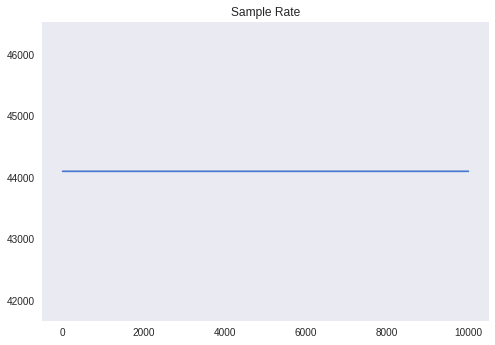

In [36]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-muted')
# sample rate of all audio file is 44100
plt.plot(sample_rate_list)
plt.title('Sample Rate');

In [ ]:
duration_list = []

for i in range(10000):
  path = f'./onedrive/jss-dataset/jss/{i}.wav'
  duration_list.append(librosa.get_duration(filename=path))

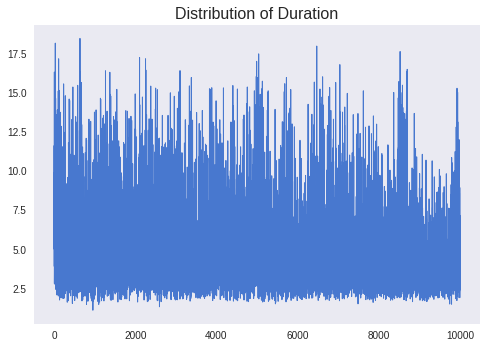

In [49]:
plt.style.use('seaborn-muted')
plt.plot(duration_list)
plt.title('Distribution of Duration', size=16);

In [ ]:
!zip -r /content/drive/MyDrive/glow-tts-dialect/jss-dataset.zip ./onedrive/jss-dataset/

https://tts.readthedocs.io/en/latest/formatting_your_dataset.html#formatting-your-dataset

```
/jss-dataset
      |
      | -> metadata.tcv
      | -> metadata.txt
      | -> /wavs
              | -> 0.wav
              | -> 1.wav
              | ...
```